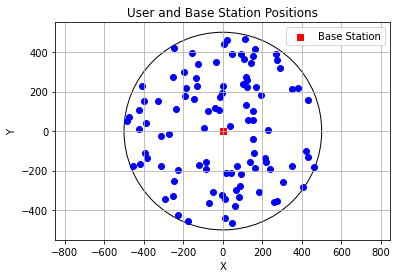

Rate of all users (in bps/Hz): 
38.17586214774664
27.905556200949757
32.10316419994085
30.203040725768695
33.32638293486892
32.50667017165488
29.558185024367045
30.761142206698906
27.01949174553375
28.076994332689814
27.267799725785395
30.31378156205018
28.55733542343526
30.91075373141314
24.740605438929727
27.228242942429024
28.08309011288219
28.647027434052927
27.699935415778704
27.563792820062584
27.06693903029561
25.763452652222984
29.065384991007363
29.700945995935317
24.756600041685758
27.37205040709876
27.717434269505823
30.006830700376124
25.24040948649313
29.941752723097217
25.550399056666308
26.568937920918412
28.557683473076672
27.763749994726822
28.842896770820225
26.738819904514358
26.719313959551734
27.93293441536833
25.383688651369358
26.80059761264347
25.360532785295042
26.09646408719842
24.840227674175857
25.413036058266055
20.302287002348564
24.548954769943446
27.714327378070347
24.816723660867787
25.26797342045822
22.574535879486874
24.968474296242245
27.514578386259

In [31]:
import matplotlib.pyplot as plt
import numpy as np 
import random 
from Functions import *

# Constants 
GRID_RADIUS = 500
NUM_USERS = 100
BASE_STATION_POSITION = (0, 0)
PATH_LOSS_EXPONENT = 4
TRANSMIT_POWER_WATTS = 2 #in watts
TRANSMIT_POWER = 10*np.log10(TRANSMIT_POWER_WATTS/1e-3) # in dBm
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 28
NOISE = 0

# Generate user positions
user_positions = generate_user_positions(NUM_USERS, GRID_RADIUS)

# Generate base station positions
base_station_positions = generate_station_positions(BASE_STATION_POSITION)

# Compute the distances from each user to the base station
distances = compute_distances(user_positions)

# Sorting the distances array for the correct plot
d = np.sort(distances)

# Compute the path loss associated with each user
path_loss = compute_path_loss(d, PATH_LOSS_EXPONENT)

# Generate the Rayleigh Fading Channel for each user
rayleigh_channel = generate_rayleigh_fading_channel(NUM_USERS, FADING_STD_MEAN, FADING_STD_DEV)

# Calculate link budget
link_budget = calc_link_budget(rayleigh_channel, d, PATH_LOSS_EXPONENT, TRANSMIT_POWER)

#Calculate the noise value
#noise = compute_noise(NOISE_FLOOR, BANDWIDTH)
noise = -133 # in dBm

# Calculate SNR
SNR = compute_SNR(link_budget, noise)

# Calculate rate 
rate = compute_rate(SNR)

# Compute the outage probability
outage_probability = compute_outage_probability(NUM_USERS, rate, RATE_THRESHOLD)

# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('User and Base Station Positions')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Print SNR values
print('Rate of all users (in bps/Hz): ')
for element in rate:
    print(element)

print()
print('Outage probability for the simulated environment: '"{:.3f}".format(outage_probability))

In [ ]:
# Assuming you have arrays 'distance' and 'path_loss' containing the data
plt.plot(d, 1/path_loss)
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss')
plt.title('Path Loss vs. Distance')
plt.grid(True)
plt.show()

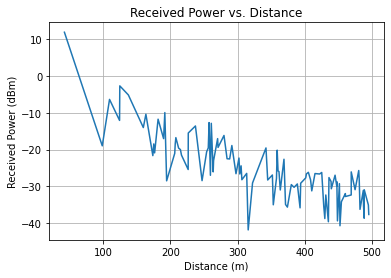

In [32]:
# Assuming you have arrays 'distance' and 'snr' containing the data
plt.plot(d,link_budget)
plt.xlabel('Distance (m)')
plt.ylabel('Received Power (dBm)')
plt.title('Received Power vs. Distance')
plt.grid(True)
plt.show()

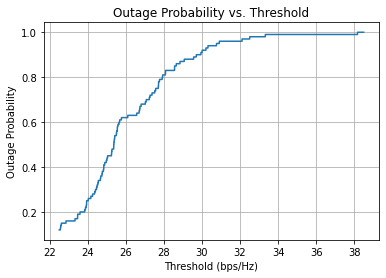

In [33]:
# Assuming you have an array 'threshold' containing the threshold values
threshold = np.arange(22.5,38.5, 0.001)

outage_probability = np.zeros(len(threshold))

# Calculating the outage probability for each threshold
for i in range(len(threshold)):
    outage_probability[i] = np.mean(rate <= threshold[i])

# Plotting the outage probability vs. threshold
plt.plot(threshold, outage_probability)
plt.xlabel('Threshold (bps/Hz)')
plt.ylabel('Outage Probability')
plt.title('Outage Probability vs. Threshold')
plt.grid(True)
plt.show()

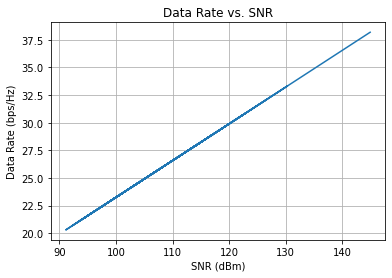

In [34]:
plt.plot(SNR, rate)
plt.xlabel('SNR (dBm)')
plt.ylabel('Data Rate (bps/Hz)')
plt.title('Data Rate vs. SNR')
plt.grid(True)
plt.show()

OUTAGE PROBS FOR 100 SIMULATIONS

In [35]:
NUM_SIMULATIONS = 100

# Initialize list to store individual outage probabilities
outage_probabilities = []

# Perform simulations
for i in range(NUM_SIMULATIONS):
    
    # Generate the Rayleigh Fading Channel for each user
    rayleigh_channel = generate_rayleigh_fading_channel(NUM_USERS, FADING_STD_MEAN, FADING_STD_DEV)
    
    # Calculate link budget
    link_budget = calc_link_budget(rayleigh_channel, d, PATH_LOSS_EXPONENT, TRANSMIT_POWER)
    
    # Calculate SNR
    SNR = compute_SNR(link_budget, noise)

    # Calculate rate 
    rate = compute_rate(SNR)
    
    # Compute outage probability at each iteration
    outage_probability = compute_outage_probability(NUM_USERS, rate, RATE_THRESHOLD)
    outage_probabilities.append(outage_probability)
    print('Outage probability for the simulation number', i+1, 'is', outage_probability)
    
# Compute average outage probability
average_outage_probability = compute_average_outage_probability(outage_probabilities)
print()
print('Average Outage Probability: ', "{:.3f}".format(average_outage_probability))


Outage probability for the simulation number 1 is 0.82
Outage probability for the simulation number 2 is 0.82
Outage probability for the simulation number 3 is 0.81
Outage probability for the simulation number 4 is 0.78
Outage probability for the simulation number 5 is 0.86
Outage probability for the simulation number 6 is 0.87
Outage probability for the simulation number 7 is 0.78
Outage probability for the simulation number 8 is 0.79
Outage probability for the simulation number 9 is 0.82
Outage probability for the simulation number 10 is 0.82
Outage probability for the simulation number 11 is 0.8
Outage probability for the simulation number 12 is 0.82
Outage probability for the simulation number 13 is 0.84
Outage probability for the simulation number 14 is 0.83
Outage probability for the simulation number 15 is 0.79
Outage probability for the simulation number 16 is 0.87
Outage probability for the simulation number 17 is 0.85
Outage probability for the simulation number 18 is 0.8
Out

In [19]:
help(Functions)

Help on module Functions:

NAME
    Functions

FUNCTIONS
    calc_link_budget(rayleigh_channel, distance, path_loss_exponent, transmit_power)
    
    compute_SNR(link_budget, noise_floor)
    
    compute_average_outage_probability(outage_probabilities)
        # Function to compute average outage probability
    
    compute_distances(user_positions)
    
    compute_noise(noise_floor, bandwidth)
    
    compute_outage_probability(num_users, rate, rate_threshold)
        # Function to compute outage probability at each iteration
    
    compute_path_loss(distances, path_loss_exponent)
    
    compute_rate(SNR)
    
    generate_rayleigh_fading_channel(num_users, std_mean, std_dev)
    
    generate_station_positions(base_station_position)
    
    generate_user_positions(num_users, grid_radius)

FILE
    f:\github\bilal_codes\siso\functions.py


